# Comparing Ridge, Lasso, Elastic Net -- and a Dark Horse Model

In this notebook, we'll dig into **Ridge Regression**, **Lasso Regression**, and **Elastic Net** using the `fetch_california_housing` dataset from Scikit-learn. By far, one of the coolest parts of this notebook is exploring -- and visualizing -- how Lasso operates as a powerful tool for feature selection. Ultimately, we'll compare the performance of all three models, only to find that a dark horse model proves the most powerful of all.

Here's the trail we'll be following:

**Pipeline**:

**Part 1: Ridge Regression**
- Import libraries and load the dataset
- Set X and y, the features and target
- Visualize the dataset: Plot first, model second
- Run Ridge Regression
- Tune the hyperparameter
- Compare and visualize the results of GridSearchCV
- Run Ridge Regression *with* polynomial features
- Tune the hyperparameter with polynomial features
- Compare and visualize the results of GridSearchCV *with* polynomial features
- Explore and visualize the Ridge Regression coefficients
- Visualize the learning curve or how Ridge coefficients shrink as `alpha` increases
- Perform grid search on preprocessing steps and model parameters

**Part II: Lasso Regression**
- Run Lasso Regression
- Use Lasso Regression to *effectively* perform feature selection

**Part III: Elastic Net**
- Run Elastic Net
- Visualize the grid search results for Elastic Net
- Comapre the performance of Ridge, Lasso, and Elastic Net
- Evaluate the performance of a dark horse model

## Acknowledgements

This notebook builds on a lecture by Tao Li, Associate Professor in the Department of Information & Analytics at Santa Clara University's Leavey School of Business. Many thanks to Professor Li for delivering lectures that spark continued exploration.

## Part I: Ridge Regression

## Import libraries and load the dataset

In [1]:
# Start with the imports
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [2]:
# Now, import Ridge, LinearRegression and Lasso from scikit-learn
from sklearn.linear_model import Ridge, LinearRegression, Lasso

In [3]:
# Next, import cross_val_score for evaluating model performance with cross-validation
from sklearn.model_selection import cross_val_score

Now, to load our dataset from Scikit-learn -- `fetch_california_housing`.

In [4]:
# Load the dataset
from sklearn.datasets import fetch_california_housing
california = fetch_california_housing(as_frame=True) # Setting as_frame=True provides a built-in DataFrame version

In [5]:
# Check the description of the dataset
california['DESCR']

'.. _california_housing_dataset:\n\nCalifornia Housing dataset\n--------------------------\n\n**Data Set Characteristics:**\n\n:Number of Instances: 20640\n\n:Number of Attributes: 8 numeric, predictive attributes and the target\n\n:Attribute Information:\n    - MedInc        median income in block group\n    - HouseAge      median house age in block group\n    - AveRooms      average number of rooms per household\n    - AveBedrms     average number of bedrooms per household\n    - Population    block group population\n    - AveOccup      average number of household members\n    - Latitude      block group latitude\n    - Longitude     block group longitude\n\n:Missing Attribute Values: None\n\nThis dataset was obtained from the StatLib repository.\nhttps://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html\n\nThe target variable is the median house value for California districts,\nexpressed in hundreds of thousands of dollars ($100,000).\n\nThis dataset was derived from the 1990 U.S

In [6]:
# Check the keys of the dataset
california.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'feature_names', 'DESCR'])

In [7]:
# Now check the 'feature_names'
california.feature_names

['MedInc',
 'HouseAge',
 'AveRooms',
 'AveBedrms',
 'Population',
 'AveOccup',
 'Latitude',
 'Longitude']

In [8]:
# Check the target_names -- there's just one the 'MedHouseVal' or median house value
california.target_names

['MedHouseVal']

In [9]:
# Check out frame, or the DataFrame version of the dataset
california.frame

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422
...,...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847


## Set X and y, the features and target

In [10]:
# Set X, the features
X = california.data

In [11]:
# Set y, the target
y = california.target

In [12]:
# Check the shape of X
X.shape

(20640, 8)

In [13]:
# Check the type of X
type(X)

pandas.core.frame.DataFrame

In [14]:
# And check the shape of y
y.shape

(20640,)

In [15]:
# And check the type
type(y)

pandas.core.series.Series

## Visualize the dataset: Plot first, model second

Let's examine the relationship between the features and the target, or the median housing prices.

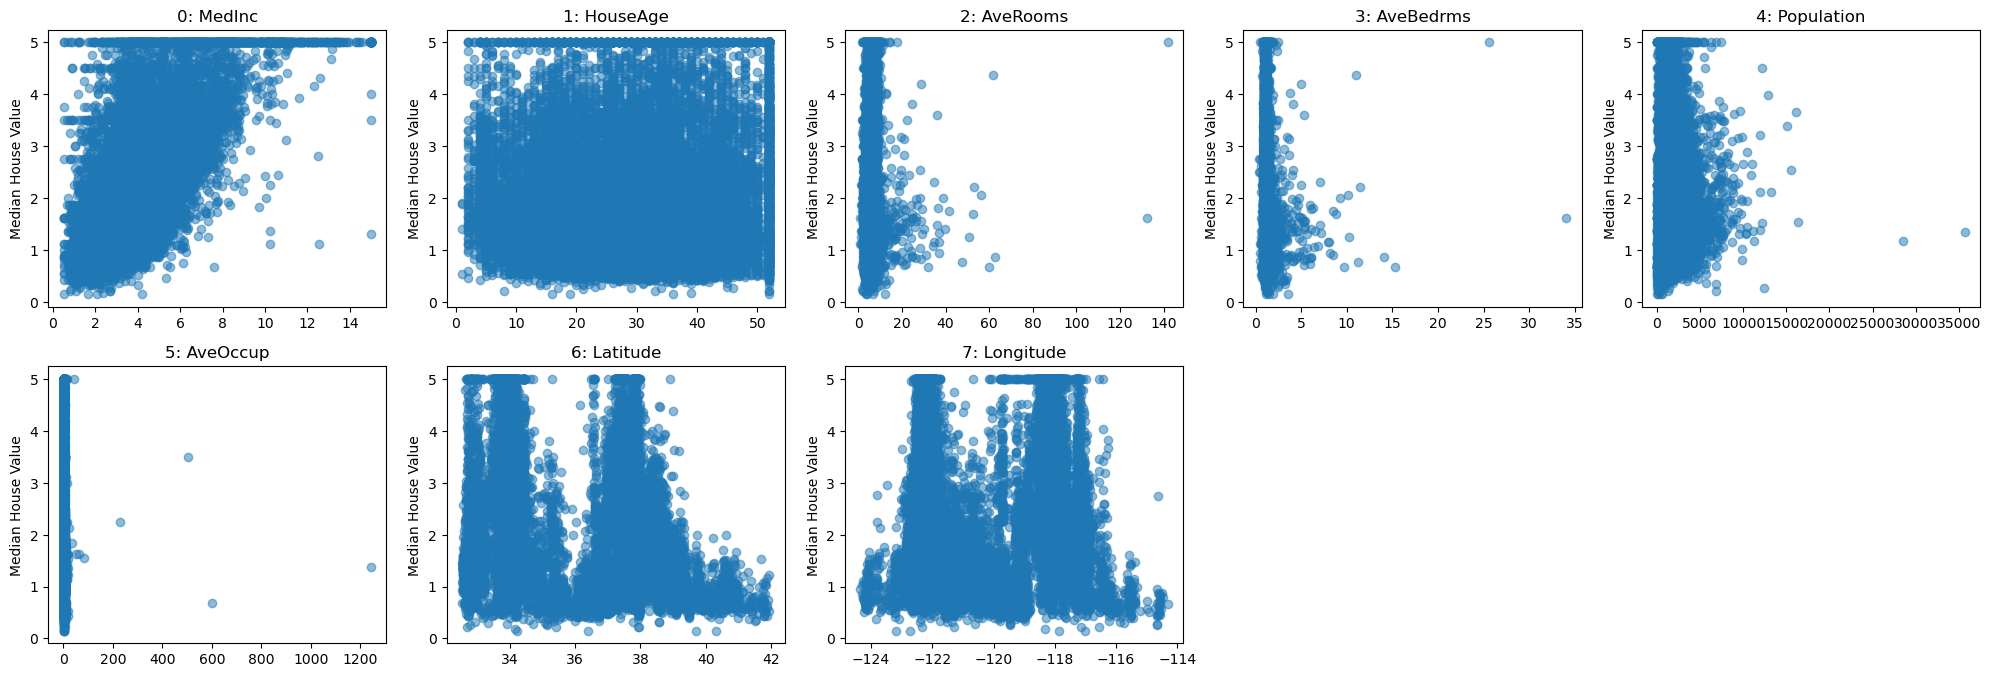

In [16]:
# Create a 3x5 grid of subplots with a large figure size
fig, axes = plt.subplots(3, 5, figsize=(20, 10))

# Create a foor loop to loop through each subplot axis and corresponding feature
for i, ax in enumerate(axes.ravel()):
    if i > 7:  # Corresponds to the 8 features in the dataset
        ax.set_visible(False)  # Hide any extra empty subplots
        continue

    # Scatter plot of each feature vs. target, or median house value
    ax.scatter(X.iloc[:, i], y, alpha=0.5)
    ax.set_title(f"{i}: {X.columns[i]}")  # Title with index and feature name
    ax.set_ylabel("Median House Value")  # Y-axis label

# Adjust layout to avoid overlap
plt.tight_layout()

# Display the plot
plt.show()

## Run Ridge Regression

First, we'll consider the situation without polynomial features and see what will happen

In [91]:
# Import train_test split from scikit-learn
from sklearn.model_selection import train_test_split

# Split training and testing according to the standard 75/25, set random state = 42 for reproducibility 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [92]:
# Check the length of X_train, X_test, y_train, y_test
print(len(X_train))
print(len(X_test))
print(len(y_train))
print(len(y_test))

15480
5160
15480
5160


In [93]:
# Import LinearRegeression
from sklearn.linear_model import LinearRegression

# Use LinearRegression to run a 10-fold cross-validation on the training
cross_val_score(LinearRegression(), X_train, y_train, cv=10)

array([0.61 , 0.59 , 0.611, 0.63 , 0.599, 0.602, 0.648, 0.572, 0.602,
       0.599])

In [94]:
# So, np.mean() gives us the average of all 10 scores
np.mean(cross_val_score(LinearRegression(), X_train, y_train, cv=10))

0.6062585589652916

Now, run a **Ridge (or regularized) Regression**, which has an L2 penalty.

In [95]:
# Start by importing Ridge from scikit-learn
from sklearn.linear_model import Ridge

# The code is amost exactly the same but we specify 'Ridge' as the model
cross_val_score(Ridge(), X_train, y_train, cv=10)

array([0.61 , 0.59 , 0.61 , 0.63 , 0.599, 0.602, 0.648, 0.572, 0.602,
       0.599])

In [96]:
# Now calculate the average, as done above, with numpy
np.mean(cross_val_score(Ridge(), X_train, y_train, cv=10))

0.6062578193430906

The ever so slight drop incidates an **underfitting** problem, or that the model is not complicated enough.

## Tune the hyperparameter

To improve model performance, we'll use **Ridge Regression with cross-validation** to tune the regularization hyperparameter `alpha`, which determines how strongly the model penalizes large coefficients.

In [23]:
# Set numpy print options to improve readability of numerical output
np.set_printoptions(suppress=True, precision=3)

In [97]:
# Import GridSearchCV to help us tune hyperparameters using cross-validation
from sklearn.model_selection import GridSearchCV

# Create a grid of 'alpha' values, or regularization strengths, to evaluate how 
# strongly Ridge penalizes large coefficients, using a log scale from 0.001 to 1000
param_grid = {'alpha': np.logspace(-3, 3, 13)}
print(param_grid)

{'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])}


In [98]:
# Next, run GridSearchCV to run this parameter grid using 10-fold cross-validation, 
# and keep all the training data
grid = GridSearchCV(Ridge(), param_grid, cv=10, return_train_score=True)

# Fit the model using the training set
grid.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=Ridge(),
             param_grid={'alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

To find out our results, need to turn `grid.cv_results_` into a DataFrame.

## Compare and Visualize the results of GridSearchCV

In [99]:
# Import pandas
import pandas as pd

# Create the specified DataFrame
results = pd.DataFrame(grid.cv_results_)
results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.004,2.343e-03,4.040e-03,3.807e-03,0.001,{'alpha': 0.001},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
1,0.002,3.081e-04,8.301e-04,2.491e-04,0.003,{'alpha': 0.0031622776601683794},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
2,0.002,3.626e-05,7.946e-04,2.620e-04,0.010,{'alpha': 0.01},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
3,0.002,1.052e-03,1.359e-03,8.969e-04,0.032,{'alpha': 0.03162277660168379},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
4,0.002,5.430e-04,9.399e-04,2.517e-04,0.100,{'alpha': 0.1},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
5,0.002,2.181e-04,1.400e-03,1.635e-03,0.316,{'alpha': 0.31622776601683794},0.610,0.590,0.611,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
6,0.002,3.371e-04,1.188e-03,5.795e-04,1.000,{'alpha': 1.0},0.610,0.590,0.610,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
7,0.002,2.230e-04,8.584e-04,2.911e-04,3.162,{'alpha': 3.1622776601683795},0.610,0.590,0.610,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
8,0.002,1.501e-04,8.368e-04,1.552e-04,10.000,{'alpha': 10.0},0.610,0.591,0.610,0.630,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002
9,0.002,1.727e-04,1.024e-03,3.445e-04,31.623,{'alpha': 31.622776601683793},0.610,0.591,0.610,0.629,...,0.610,0.608,0.611,0.609,0.606,0.613,0.611,0.611,0.610,0.002


Let's take a look at the mean scores for both the training *and* test sets.

In [100]:
# Let's sort the mean training scores
results['mean_train_score'].sort_values(ascending=False)

0     0.610
1     0.610
2     0.610
3     0.610
4     0.610
5     0.610
6     0.610
7     0.610
8     0.610
9     0.610
10    0.609
11    0.607
12    0.599
Name: mean_train_score, dtype: float64

In [102]:
# Let's sort the  mean test scores
results['mean_test_score'].sort_values(ascending=False)

0     0.606
1     0.606
2     0.606
3     0.606
4     0.606
5     0.606
6     0.606
7     0.606
8     0.606
9     0.606
10    0.606
11    0.603
12    0.595
Name: mean_test_score, dtype: float64

Now, let's visualize the results.

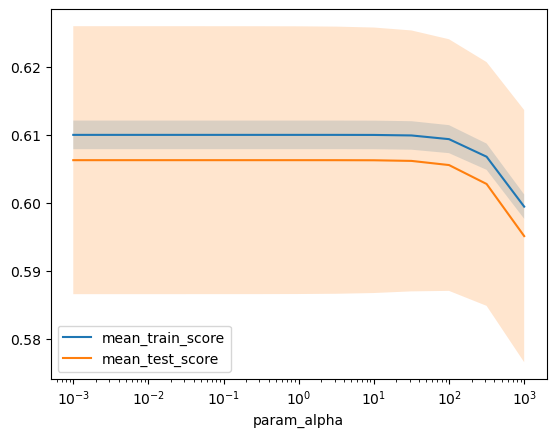

In [103]:
# Plot mean training scores vs. alpha values
results.plot('param_alpha', 'mean_train_score')

# Plot mean test scores vs. alpha values on the same axis
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

# Fill the area between (mean ± std) for training scores to show variance
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)

# Fill the area between (mean ± std) for test scores to show variance
plt.fill_between(results.param_alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)

# Add legend to differentiate curves
plt.legend()

# Use logarithmic scale for alpha, or regularization strength
plt.xscale("log")

# Display the plot
plt.show()

In [104]:
# Show the regularization strength (alpha) that gave the best performance
grid.best_params_  

{'alpha': 0.001}

In [105]:
# Show the best score for the above alpha
grid.best_score_  

0.606258558327767

**Takeaway**: That above score indicates that the model is *still* underfitting, as it marks just a slight improvement from the pre-tuning score: 0.6062578193430906. To address this issue, we'll introduce some polynomial features -- aka make the model *more* complicated.

## Run Ridge Regression *with* polynomial features

Let's begin with the important imports.

In [106]:
# Import PolynomialFeatures, StandardScaler and make_pipeline
# Worth noting: StandardScaler is crucial because Polynomial Features
# have a very large magnitude and vary significantly
# Finally, make_pipeline is used for streamlining the process
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline

In this cell, we're going to use the `.transform()` method in Scikit-learn, which takes the input data and applied a pre-learned transformation to it, like scaling or creating polynomial features.

In [107]:
# Add polynomial features to the degree of 2, which is the default
poly = PolynomialFeatures(degree=2).fit(X_train)

# Use the .trasnsform() method in scikit-learn to transform the original training data
# to include these new polynomial features
X_train_poly = poly.transform(X_train)

# Transform the test set, too
X_test_poly = poly.transform(X_test)

# Display the shape of the original training set (rows, original features)
print("X_train.shape: {}".format(X_train.shape))

# Show the shape of the transformed training set (rows, expanded features)
print("X_train_poly.shape: {}".format(X_train_poly.shape))

X_train.shape: (15480, 8)
X_train_poly.shape: (15480, 45)


In [108]:
# Next, let's print out the feature names
print("Polynomial feature names:\n{}".format(poly.get_feature_names_out()))

Polynomial feature names:
['1' 'MedInc' 'HouseAge' 'AveRooms' 'AveBedrms' 'Population' 'AveOccup'
 'Latitude' 'Longitude' 'MedInc^2' 'MedInc HouseAge' 'MedInc AveRooms'
 'MedInc AveBedrms' 'MedInc Population' 'MedInc AveOccup'
 'MedInc Latitude' 'MedInc Longitude' 'HouseAge^2' 'HouseAge AveRooms'
 'HouseAge AveBedrms' 'HouseAge Population' 'HouseAge AveOccup'
 'HouseAge Latitude' 'HouseAge Longitude' 'AveRooms^2'
 'AveRooms AveBedrms' 'AveRooms Population' 'AveRooms AveOccup'
 'AveRooms Latitude' 'AveRooms Longitude' 'AveBedrms^2'
 'AveBedrms Population' 'AveBedrms AveOccup' 'AveBedrms Latitude'
 'AveBedrms Longitude' 'Population^2' 'Population AveOccup'
 'Population Latitude' 'Population Longitude' 'AveOccup^2'
 'AveOccup Latitude' 'AveOccup Longitude' 'Latitude^2'
 'Latitude Longitude' 'Longitude^2']


Now, to build a pipeline for our more complicated model.

In [109]:
# Set up make_pipleine with StandardScaler, to standardize the features, then run Ridge Regression
pipe = make_pipeline(StandardScaler(),Ridge())

# Fit the model using our original data, the training set -- so, no polynomial features
ridge = pipe.fit(X_train, y_train)

# Evaluate the modelon the test set -- no interaction
print("Score without interactions: {:.3f}".format(
    ridge.score(X_test, y_test)))

# Fit the same pipeline using the polynomial-transformed training data -- with interaction tersm
ridge_poly = pipe.fit(X_train_poly, y_train)

# Evaluate the model on the polynomial-transformed test data
print("Score with interactions: {:.3f}".format(
    ridge_poly.score(X_test_poly, y_test)))

Score without interactions: 0.591
Score with interactions: 0.651


In [110]:
# Run 10-fold cross-validation on the training set and check the mean
np.mean(cross_val_score(pipe, X_train, y_train, cv=10))

0.606258021365664

In [111]:
# First, create a new pipeline that includes PolynomialFeatures
pipeline_with_poly = make_pipeline(PolynomialFeatures(degree=2), StandardScaler(), Ridge())

# Now, run cross-validation on the ORIGINAL data using the new pipeline
np.mean(cross_val_score(pipeline_with_poly, X_train, y_train, cv=10))

-17.093557443993888

Despite the correct pipeline setup, **this surprisingly negative score indicates that extreme outliers in the dataset are being heavily magnified by polynomial features**, limiting model performance.

### Tune the hyperparameter *with* polynomial features

In [112]:
# Create a new pipeline with three steps, as specified
pipe = make_pipeline(PolynomialFeatures(degree=2),StandardScaler(),Ridge())

# Create a grid of 'alpha' values, or regularization strengths, to evaluate how 
# strongly Ridge penalizes large coefficients, using a log scale from 0.001 to 1000
param_grid = {'ridge__alpha': np.logspace(-3, 3, 13)}

# Run the GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=10, return_train_score=True)

# Fit the grid on the original training set
grid.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             param_grid={'ridge__alpha': array([   0.001,    0.003,    0.01 ,    0.032,    0.1  ,    0.316,
          1.   ,    3.162,   10.   ,   31.623,  100.   ,  316.228,
       1000.   ])},
             return_train_score=True)

## Compare and visualize the results of GridSearchCV *with* polynomial features

In [113]:
# Turn grid.cv_results_ into a DataFrame
results_poly = pd.DataFrame(grid.cv_results_)

In [114]:
# Display the DataFrame
results_poly

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_ridge__alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.022,0.004,0.002,5.711e-04,0.001,{'ridge__alpha': 0.001},0.674,0.264,0.688,0.663,...,0.682,0.683,0.690,0.685,0.679,0.683,0.684,0.685,0.684,0.003
1,0.021,0.004,0.002,1.171e-03,0.003,{'ridge__alpha': 0.0031622776601683794},0.674,0.262,0.688,0.664,...,0.682,0.683,0.690,0.685,0.679,0.683,0.684,0.685,0.684,0.003
2,0.020,0.003,0.004,2.553e-03,0.010,{'ridge__alpha': 0.01},0.673,0.267,0.687,0.665,...,0.681,0.682,0.690,0.684,0.678,0.682,0.684,0.684,0.683,0.003
3,0.023,0.005,0.004,1.508e-03,0.032,{'ridge__alpha': 0.03162277660168379},0.671,0.317,0.684,0.665,...,0.680,0.680,0.688,0.682,0.676,0.681,0.681,0.682,0.681,0.003
4,0.025,0.007,0.006,2.610e-03,0.100,{'ridge__alpha': 0.1},0.667,0.465,0.680,0.662,...,0.677,0.677,0.685,0.678,0.673,0.678,0.678,0.679,0.678,0.003
5,0.018,0.002,0.003,2.682e-03,0.316,{'ridge__alpha': 0.31622776601683794},0.661,0.637,0.674,0.659,...,0.672,0.672,0.680,0.673,0.668,0.673,0.672,0.674,0.673,0.003
6,0.019,0.004,0.002,8.634e-04,1.000,{'ridge__alpha': 1.0},0.656,0.649,0.668,0.659,...,0.666,0.666,0.673,0.668,0.662,0.667,0.666,0.667,0.667,0.003
7,0.019,0.001,0.002,6.807e-04,3.162,{'ridge__alpha': 3.1622776601683795},0.650,0.612,0.661,0.665,...,0.659,0.659,0.666,0.664,0.656,0.661,0.661,0.661,0.661,0.003
8,0.018,0.001,0.002,7.186e-04,10.000,{'ridge__alpha': 10.0},0.643,0.625,0.654,0.669,...,0.653,0.652,0.657,0.662,0.649,0.654,0.655,0.654,0.655,0.003
9,0.019,0.004,0.003,1.624e-03,31.623,{'ridge__alpha': 31.622776601683793},0.636,0.635,0.646,0.666,...,0.646,0.644,0.648,0.659,0.642,0.647,0.648,0.647,0.647,0.004


In [115]:
# Use .sort_values() to rank the mean test scores
results_poly.mean_test_score.sort_values(ascending=False)

12     0.244
11    -0.269
10    -1.065
9     -2.463
8     -5.706
7    -11.383
6    -17.094
5    -21.142
4    -25.215
3    -33.397
2    -47.875
1    -62.464
0    -70.788
Name: mean_test_score, dtype: float64

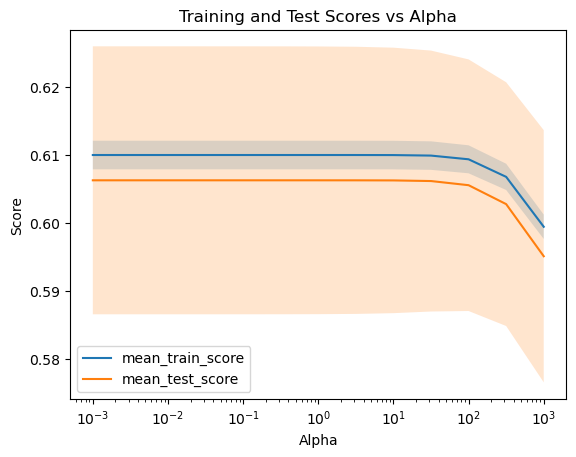

In [116]:
# Plot training and test scores
results.plot('param_alpha', 'mean_train_score')
results.plot('param_alpha', 'mean_test_score', ax=plt.gca())

# Fill area for train score variance
plt.fill_between(results['param_alpha'].astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'],
                 alpha=0.2)

# Fill area for test score variance
plt.fill_between(results['param_alpha'].astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'],
                 alpha=0.2)

# Add labels and scale
plt.legend()
plt.xscale("log")
plt.xlabel("Alpha")
plt.ylabel("Score")
plt.title("Training and Test Scores vs Alpha")

# Display the plot
plt.show()

In [117]:
# Check the best alpha
print(grid.best_params_)
print(grid.best_score_)

{'ridge__alpha': 1000.0}
0.24364039563538276


In [118]:
# Finally, evaluate the performance of this model on the test set
grid.score(X_test, y_test)

0.58790276732045

## Explore and visulize the Ridge Regression coefficients

Next, let's explore how tuning hyperparameter will influence the coefficients for Ridge Regression. We'll do so by plotting
the **magnitude** *and* **direction** of each feature’s coefficient in the best Ridge model found during cross-validation.

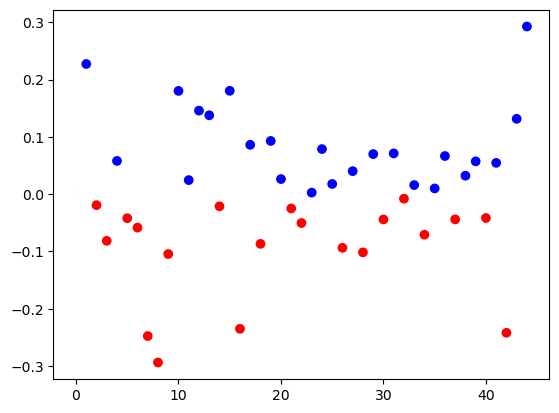

In [45]:
# The best model from above is stored in the best estimator below
# This grabs the entire pipeline (poly, scaler, idge) trained with the best alpha from cross-validation
# It's fully fitted — ready to inspect coefficients or make predictions
ridge = grid.best_estimator_

# Create the scatter plot of the coeffiicents from the Ridge model
# X-axis: The feature index
# Y-axis: The coefficient values
# The colors accord to the signs of the coefficient: +1 is blue, -1 is red
plt.scatter(range(X_train_poly.shape[1]), ridge["ridge"].coef_, c=np.sign(ridge["ridge"].coef_), cmap="bwr_r")

# Display the plot
plt.show()

Notice, unlike in Lasso Regression which delivers sparse solutions, we have lots of **non-zero values** -- but most are quite small in magnitude.. We'll calculate it precisely below.

In [46]:
# Display the shape of the X_train_poly dataset
print(X_train_poly.shape)

# Sum up the number of non-vero values
np.sum(ridge["ridge"].coef_ != 0)

(15480, 45)


44

So, the above block shows us that only *one* of the 45 features had a coefficient of exactly zero. Next, Next, we visualize how the magnitude of Ridge Regression coefficients changes with different values of the regularization strength `alpha`.

/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.91427e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.83904e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T
/opt/anaconda3/lib/python3.12/site-packages/sklearn/linear_model/_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=2.57615e-19): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


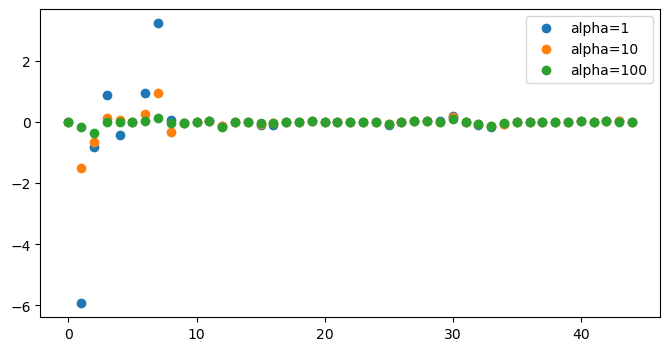

In [47]:
# Fit Ridge Regression models (alpha = 100, 10, 1)
ridge100 = Ridge(alpha=100).fit(X_train_poly, y_train)
ridge10 = Ridge(alpha=10).fit(X_train_poly, y_train)
ridge1 = Ridge(alpha=1).fit(X_train_poly, y_train)
plt.figure(figsize=(8, 4))

# Plot coefficient magnitudes for increasing alpha values
plt.plot(ridge1.coef_, 'o', label="alpha=1")
plt.plot(ridge10.coef_, 'o', label="alpha=10")
plt.plot(ridge100.coef_, 'o', label="alpha=100")

# Create the legend
plt.legend()

# Display the plot
plt.show()

The above plot illustrates a key property of Ridge Regression: **Larger alpha values impose stronger regularization**, which *shrinks* all coefficients closer to zero, helping reduce model complexity and prevent overfitting.

Next, we'll explore *200* different values for `alpha`.

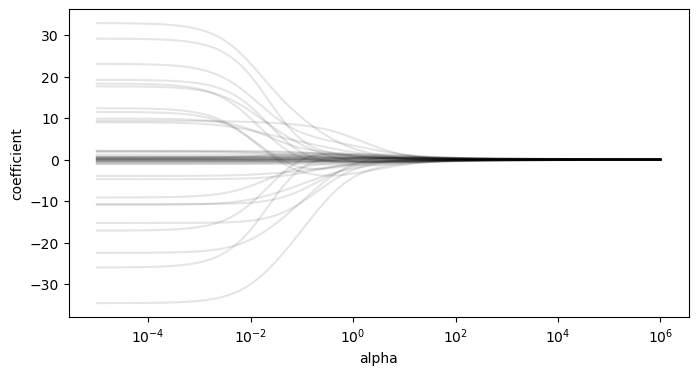

In [48]:
# Set the number of alphas
n_alphas = 200

#These alphas will be picked, logarithmically, all the way from 10^-5 ro 10^6
alphas = np.logspace(-5, 6, n_alphas)

# Set the plot size
plt.figure(figsize=(8, 4))

# Create an empty list to store the coefficients for each alpha
coefs = []

# Write a for loop to loop throuhg each value
for a in alphas:
    # Create and fir a Ridge regression model with current alpha
    ridge = Ridge(alpha=a)

    # Standardizer the data before fitting -- important for regularization
    ridge.fit(StandardScaler().fit_transform(X_train_poly), y_train)

    # Append the model coefficients to the list
    coefs.append(ridge.coef_)

# Plot how each coefficient changes as alpha increases
plt.plot(alphas, coefs, c='k', alpha=.1)

# Use log scale for x-axis to better visualize the range of values
plt.xscale("log")

# Label the axes, 'alpha' anf 'coefficient', respectively
plt.xlabel("alpha")
plt.ylabel("coefficient")

# Display the plot
plt.show()

The above plot clearly shows: As we gradually increase the value for `alpha`, the magnitude for the coefficients shrinks close to zero. Next, we need to find the best point for this `alpha` by running `GridSearchCV`.

## Visualize the learning curve or how Ridge coefficients shrink as `alpha` increases

This learning curve can clearly show us the impact of tuning `alpha`. As we increase `alpha`, we see how stronger regularization shrinks the model’s complexity and helps it generalize better to unseen data.

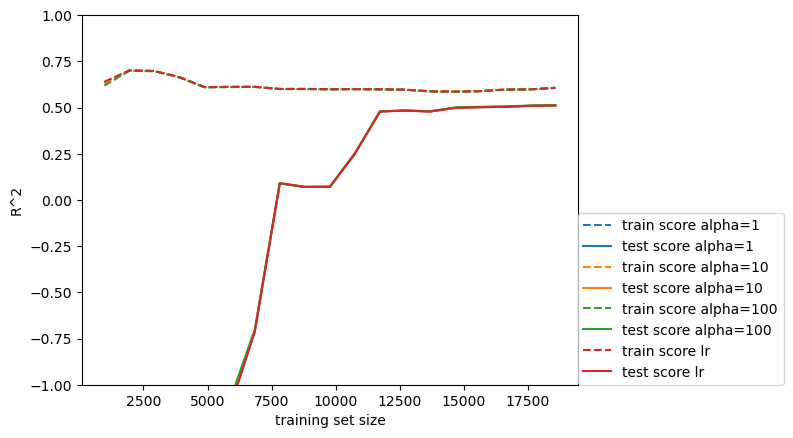

In [49]:
# Import learning curve from scikit-learn
from sklearn.model_selection import learning_curve

# This function uses the original dataset and runs 10-fold cross-validation
def plot_learning_curve(est, name):
    train_set_size, train_scores, test_scores = learning_curve(est, X, y, cv=10, train_sizes=np.linspace(0, 1, 20)[1:])
    test_mean = test_scores.mean(axis=1)
    train_mean = train_scores.mean(axis=1)
    line, = plt.plot(train_set_size, train_mean, linestyle="--", label="train score {}".format(name))
    plt.plot(train_set_size, test_mean, label="test score {}".format(name),
             c=line.get_color())

# Compare three different alpha values
plot_learning_curve(Ridge(alpha=1), "alpha=1")
plot_learning_curve(Ridge(alpha=10), "alpha=10")
plot_learning_curve(Ridge(alpha=100), "alpha=100")

# Compare the linear regression model
plot_learning_curve(LinearRegression(), "lr")
plt.legend(loc=(1, 0))
plt.xlabel("training set size")
plt.ylabel("R^2")
plt.ylim(-1, 1)

# Display the plot
plt.show()

**Notice** that the dash lines, or the training sets, are all trending toward zero -- the performance is dropping. And all the solid lines, or test sets, are going up. This suggests that as the number of training examples increases, all models tend to generalize better and perform similarly well. So, if you have enough data, it doesn't matter *which* model you pick.

## Perform grid search on preprocessing steps and model parameters

The code below This code builds a ML pipeline that applies polynomial transformation, standard scaling, and Ridge Regression -- then tunes the pipeline’s hyperparameters using grid search with cross-validation.

In [50]:
# Redefine the pipeline with the aformentioned three steps: poly, scaler and ridge
pipe = make_pipeline(PolynomialFeatures(), StandardScaler(),Ridge())

In [51]:
# This parameter grid has selected two hyperparameters to tune: 1) the degree of polynomial features and
# 2) The regularization strength, or alpha, for Ridge Regression, which has six values
# So, overall we are comparing 3x6, or 18 different combinations
param_grid = {'polynomialfeatures__degree': [1, 2, 3],
              'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

In [52]:
# Create the GridSearchCV and run 5-fold cross-validation and n_jobs=-1 means we are using all of the computer's CPU cores
grid = GridSearchCV(pipe, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid on the original training set
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('ridge', Ridge())]),
             n_jobs=-1,
             param_grid={'polynomialfeatures__degree': [1, 2, 3],
                         'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]})

In [53]:
# Import pandas
import pandas as pd

# Create a pivot table from the GridSearchCV results
res = pd.pivot_table(pd.DataFrame(grid.cv_results_), values='mean_test_score', index='param_ridge__alpha', columns='param_polynomialfeatures__degree')

# Optional: Set display precision and round the index for cleaner visuals
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [54]:
# Display the pivot table
# Notice: We have 18 values -- 3 columns and 6 rows, as specified above
res

param_polynomialfeatures__degree,1,2,3
0.001,0.607,-42.650,-68011.992
0.010,0.607,-16.414,-62031.790
0.100,0.607,-1.866,-4234.918
1.000,0.607,-0.113,-52.750
10.000,0.607,-0.260,-2.548
100.000,0.606,-0.448,-3.488


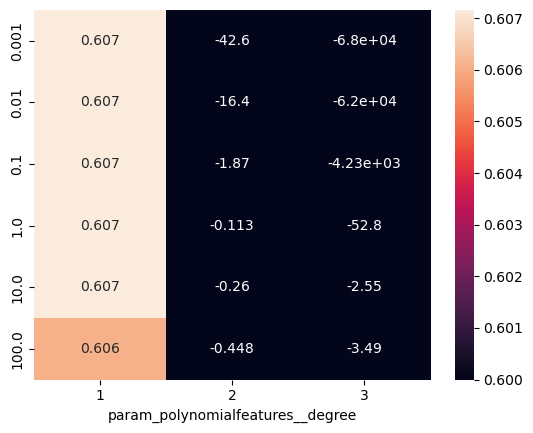

In [55]:
# Let's visualze the above table
# Start by importing seaborn and then create a heatmap
import seaborn as sns
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

# Display the plot
plt.show()

Our heatmap shows us that the best result is **0.607** at the top-left, where the model achieves its highest score with the least regularization and lowest polynomial degree. **But there's a caveat**: When the best result is on the border or in the corner, this suggests that there might be an even *better* result that follows outside of the scope of this range.

Below, we'll visualze another way to create the heatmap.

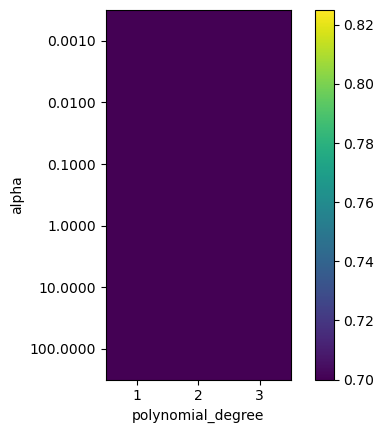

In [56]:
# Set figure resolution for better clarity
plt.figure(dpi=100)

# Display the result matrix as an image (alternative to seaborn heatmap)
plt.imshow(res, vmin=.70, vmax=.825)

# Add a color bar to interpret values
plt.colorbar()

# Extract alpha and polynomial degree values from the parameter grid
alphas = param_grid['ridge__alpha']
polynomial_degree = np.array(param_grid['polynomialfeatures__degree'])

# Label the x and y axes
plt.xlabel("polynomial_degree")
plt.ylabel("alpha")

# Set y-axis tick labels using alpha values
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])

# Set x-axis tick labels using degree values
plt.xticks(range(len(polynomial_degree)), polynomial_degree)

# Display the plot
plt.show()

In [57]:
# Now use the .best_params_ method to find, well, the best parameter
print("Best parameters: {}".format(grid.best_params_))

Best parameters: {'polynomialfeatures__degree': 1, 'ridge__alpha': 0.001}


In [58]:
# And print the tesrt score
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Test-set score: 0.59


So, the above lines of code confirm that `ridge__alpha: 0.001` and `polynomialfeatures__degree: 1` yield the best performance, with a test-set score (0.59) closely mirroring the cross-validation score from the heatmap, reinforcing the model's generalizability.

Lastly, for a benchmark comparison, we'll run the pipeline again **without any polynomial features**, using only the original input variables.

In [59]:
# Define the parameter grid for Ridge regularization strength
param_grid = {'ridge__alpha': [0.001, 0.01, 0.1, 1, 10, 100]}

# Create a pipeline with only standard scaling and Ridge Regression
# Note: No polynomial features
pipe = make_pipeline(StandardScaler(), Ridge())

# Run grid search with 5-fold cross-validation
grid = GridSearchCV(pipe, param_grid, cv=5)

# Fit the grid on the original training set
grid.fit(X_train, y_train)

# Evaluate the model on the test set
print("Score without poly features: {:.2f}".format(grid.score(X_test, y_test)))

Score without poly features: 0.59


**Takeaway**: Surprisingly, the best-performing model used no polynomial terms at all — proving that, in this case, a simple Ridge Regression was just as effective as the more complex models.

## Part II: Lasso Regression

### Run Lasso Regression

In this part of the notebook, we'll dive into Lasso Regression and learn how it can be used for feature selection. As with Ridge, we'll utilize the same `fetch_california_housing` dataset from Scikit-learn.

**Note**: We are creating a lightweight version of this part of the notebook because it keeps blowing up.

In [60]:
# Start with the imports -- even if some have been imported above
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
import numpy as np
import pandas as pd

# Here's our simpler pipeline to prevent overloading
pipe2 = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    Lasso(max_iter=10000)  # Notice this is a much smaller max_iter to speed up the process
)

# Lightweight param grid: Fewer alphas
param_grid = {'lasso__alpha': [0.01, 0.1, 1]}

# Reduced number of folds to reduce compute load
grid2 = GridSearchCV(pipe2, param_grid, cv=3, return_train_score=True, verbose=1)

# Fit the grid to the training set
grid2.fit(X_train, y_train)

Fitting 3 folds for each of 3 candidates, totalling 9 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('lasso', Lasso(max_iter=10000))]),
             param_grid={'lasso__alpha': [0.01, 0.1, 1]},
             return_train_score=True, verbose=1)

In [61]:
# Create a DataFrame to view the results
# View results
results = pd.DataFrame(grid2.cv_results_)
results[['param_lasso__alpha', 'mean_test_score', 'mean_train_score']]

,param_lasso__alpha,mean_test_score,mean_train_score
0,0.01,3.709e-01,0.617
1,0.10,5.030e-01,0.503
2,1.00,-1.396e-04,0.000


## Use Lasso Regression to *effectively* perform feature selection

Now, Let's visualize those results.

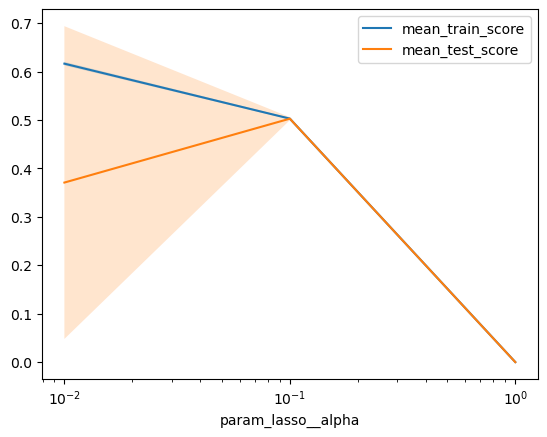

In [62]:
# Plot the training score line
results.plot('param_lasso__alpha', 'mean_train_score')

# Plot the test score line on the same axes
results.plot('param_lasso__alpha', 'mean_test_score', ax=plt.gca())

# Shade in the standard deviation around the training score (± std)
plt.fill_between(results.param_lasso__alpha.astype(float),
                 results['mean_train_score'] + results['std_train_score'],
                 results['mean_train_score'] - results['std_train_score'], alpha=0.2)

# Shade in the standard deviation around the test score (± std)
plt.fill_between(results.param_lasso__alpha.astype(float),
                 results['mean_test_score'] + results['std_test_score'],
                 results['mean_test_score'] - results['std_test_score'], alpha=0.2)

# Add a legend to label the lines
plt.legend()

# Set the x-axis to a logarithmic scale (so 0.01, 0.1, 1 are spaced well)
plt.xscale("log")

# Display the plot
plt.show()

**Takeaway**: This plot confirms what we saw in the table earlier -- **too much Lasso regularization kills model performance**. Essentially, the model is too *empty* learn anything useful.

In [63]:
# Display the best alpha value found during cross-validation
print(grid2.best_params_)

# Now, display the best mean cross-validated score corresponding to that alpha
print(grid2.best_score_)

{'lasso__alpha': 0.1}
0.502950844869614


In [64]:
# And, now evaluate the final model -- with best alpha --on test set that we held out
grid2.score(X_test, y_test)

0.5010032479733857

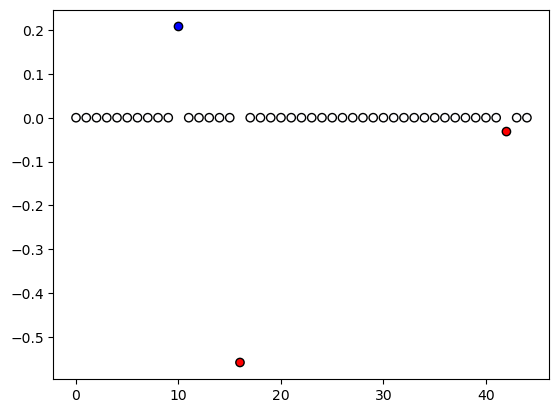

In [65]:
# Retrieve the best Lasso model from the grid search
lasso = grid2.best_estimator_

# Plot the Lasso coefficients for each polynomial feature
# - X-axis: index of each feature
# - Y-axis: value of the corresponding Lasso coefficient
# - Color: based on sign of the coefficient -- positive or negative
# - Many coefficients are zero due to Lasso regularization!
plt.scatter(range(X_train_poly.shape[1]), lasso['lasso'].coef_, c=np.sign(lasso['lasso'].coef_), cmap="bwr_r", edgecolor='k')

# Display the plot
plt.show()

In [66]:
# Display the shape of X_train_poly
print(X_train_poly.shape)

# Sum up the total number of non-zero values -- as we can see above, it will be three
np.sum(lasso['lasso'].coef_ != 0)

(15480, 45)


3

This above output is very important in terms of **feature selection**, as Lasso is telling us that those three features are the ones that we should care about for modeling.

Lastly, let's look at how increasing the value of `alpha` can help us to select features.

In [67]:
# Import lars_path from scikit-learn which shows us how the coefficients will be reduced when we increase the valye of alpha
from sklearn.linear_model import lars_path

# Split the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# Turn the training data into numpy arrays -- required for lars_path
X_np = X_train.to_numpy()
y_np = y_train.to_numpy()

# Run lars_path with Lasso method
alphas, active, coefs = lars_path(X_np, y_np, eps=0.00001, method="lasso")

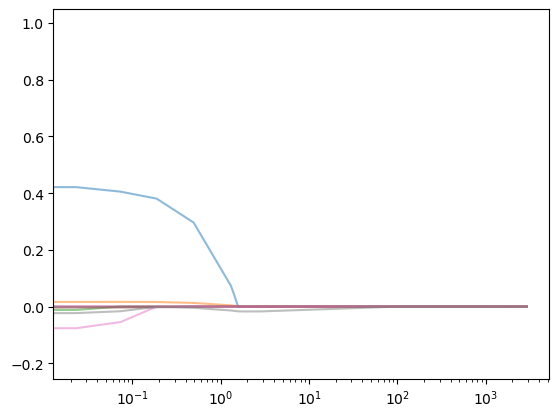

In [68]:
# Plot the regularization path, or how the coefficients shrink as alpha increases
# Notice that `coefs.T` transposes the coefficient matrix so each line represents one feature's path
# and `alpha=0.5` sets the transparency level of the lines
plt.plot(alphas, coefs.T, alpha=0.5)

# Set the x-axis to a logarithmic scale for better visualization of alpha's effect
plt.xscale("log")

# Display the plot
plt.show()

**Takeawy**: Effective feature selection. As alpha increases, Lasso regularization drives most coefficients to **zero**, essentially performing feature selection by retaining only the most influential variables. To underscore this point, the feature represented by the bleu line is the most important as it's the last one to drop to zero. The flat lines? Lasso eliminated them.

## Part III: Elastic Net

## Elastic Net

Now, to run Elastic Net, which is a combination, or weighted average of L1 and L2 regression -- or Lasso and Ridge Regression. **Note**: For this block, we are also running a streamlined version of Elastic Net to prevent freezing.

In [70]:
# Import Elastic Net from scikit-learn
from sklearn.linear_model import ElasticNet

In [74]:
# Build a new --simplified -- pipeline!
# This pipeline has three steps, like we'd expect, and of course the last one is now ElasticNet
pipe = make_pipeline(
    PolynomialFeatures(degree=2),
    StandardScaler(),
    ElasticNet(max_iter=100000)
)

# Create a smaller parameter grid
param_grid = {
    'elasticnet__alpha': [0.01, 0.1],      
    'elasticnet__l1_ratio': [0.3, 0.7]     
}

# Build a grid with just 3-fold cross-validation -- instead of 10
grid3 = GridSearchCV(pipe, param_grid=param_grid, cv=3, verbose=1)

# Fit the grid on the original training set
grid3.fit(X_train, y_train)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('polynomialfeatures',
                                        PolynomialFeatures()),
                                       ('standardscaler', StandardScaler()),
                                       ('elasticnet',
                                        ElasticNet(max_iter=100000))]),
             param_grid={'elasticnet__alpha': [0.01, 0.1],
                         'elasticnet__l1_ratio': [0.3, 0.7]},
             verbose=1)

In [75]:
# Display all available result columns from the grid search
pd.DataFrame(grid3.cv_results_).columns

Index(['mean_fit_time', 'std_fit_time', 'mean_score_time', 'std_score_time',
       'param_elasticnet__alpha', 'param_elasticnet__l1_ratio', 'params',
       'split0_test_score', 'split1_test_score', 'split2_test_score',
       'mean_test_score', 'std_test_score', 'rank_test_score'],
      dtype='object')

In [76]:
# Import pandas
import pandas as pd

# Create the pivot table from the grid results
res = pd.pivot_table(pd.DataFrame(grid3.cv_results_), values='mean_test_score', index='param_elasticnet__alpha', columns='param_elasticnet__l1_ratio')
pd.set_option("display.precision",3)
res = res.set_index(res.index.values.round(4))

In [77]:
# Display the DataFrame
res

param_elasticnet__l1_ratio,0.3,0.7
0.01,0.164,0.285
0.10,0.564,0.508


## Visualize the grid search results for Elastic Net

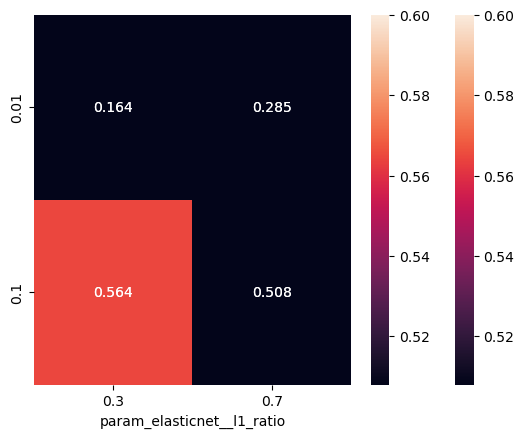

In [79]:
# Import seaborn for heatmap visualization
import seaborn as sns

# Now, create a heatmap of the results matrix
sns.heatmap(res, annot=True, fmt=".3g", vmin=0.6)

# Display the plot
plt.show()

The best result in this minimalistic heatmap is easy enough to find -- it's 0.564, in the lower left corner. Below, we'll generate one more heatmap.

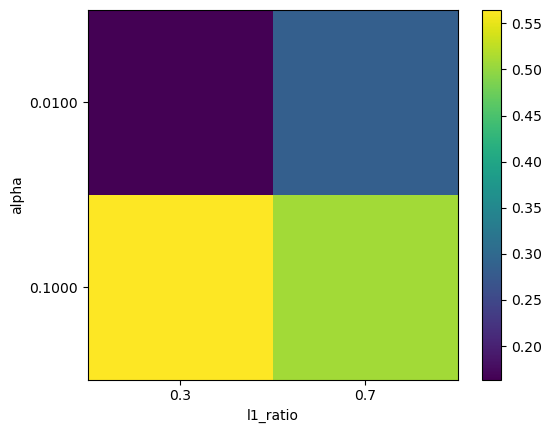

In [82]:
# Set figure resolution
plt.figure(dpi=100)

# Plot heatmap using imshow
plt.imshow(res)  # As we defeined res, or  the grid search score matrix, above

# Add a colorbar to visualize score scale
plt.colorbar()

# Extract alpha and l1_ratio values from param_grid
alphas = param_grid['elasticnet__alpha']
l1_ratio = np.array(param_grid['elasticnet__l1_ratio'])

# Label the axes
plt.xlabel("l1_ratio")
plt.ylabel("alpha")

# Set tick marks and format for axes
plt.yticks(range(len(alphas)), ["{:.4f}".format(a) for a in alphas])
plt.xticks(range(len(l1_ratio)), l1_ratio)

# Display the plot
plt.show()

In [83]:
# Use the .best_params_ method to find the alpha value and l1 ratio
print(grid3.best_params_)

# Display the score for the best alpha and l1_ratio combination
print(grid3.best_score_)

{'elasticnet__alpha': 0.1, 'elasticnet__l1_ratio': 0.3}
0.5644599217796177


These results indicate that the model performs best when it **leans more toward Ridge regularization**, but still includes *some* sparsity from Lasso.

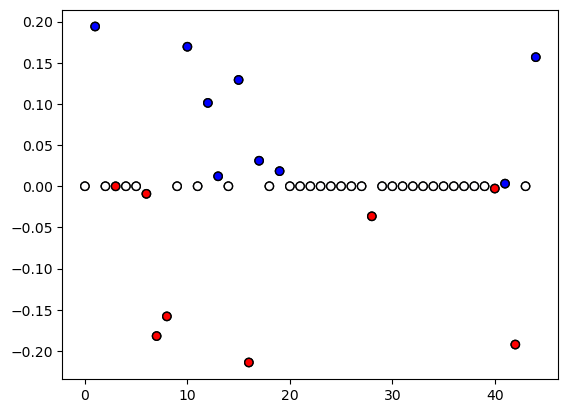

In [85]:
# Get the best Elastic Net model found by GridSearchCV
en = grid3.best_estimator_

# Then plot its coefficients: blue = positive, red = negative, white = zero (not selected)
plt.scatter(range(X_train_poly.shape[1]), en['elasticnet'].coef_, c=np.sign(en['elasticnet'].coef_), cmap="bwr_r", edgecolor='k')

# Display the plot
plt.show()

In [86]:
# Check the shape of X_train_poly
print(X_train_poly.shape)

# Sum up the total number of non-zero values
np.sum(en['elasticnet'].coef_ != 0)

(15480, 45)


17

In [88]:
# Check the score on the test set, which we, of coruse, held out
grid3.score(X_test, y_test)

0.5584269187981974

## Compare Ridge, Lasso and Elastic Net

Finally, let's compare the three test results to see which of our three models -- Ridge, Lasso and Elastic Net -- was best. In the code below, `grid` corresponds to Ridge, `grid2` corresponds to Lasso and `grid3` corresponds to Elastic Net.

In [119]:
print(grid.score(X_test, y_test))
print(grid2.score(X_test, y_test))
print(grid3.score(X_test, y_test))

0.58790276732045
0.5010032479733857
0.5584269187981974


There it is -- while all three models performed reasonably well, **Ridge Regression achieved the highest test score**, indicating it generalized the best to the test data.

⚠️ **Important Note**:
While Ridge Regression was executed with the full planned hyperparameter tuning and cross-validation, both Lasso and Elastic Net were run with a streamlined setup due to technical issues during grid search. As a result, the slightly lower performance of Lasso and Elastic Net may not reflect their full potential under more thorough tuning.

## Evaluate the performance of a dark horse model

Here's a quick look at Random Forest Regressor -- another type of model that can be used for these regression tasks.

In [121]:
# Import RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Fit the model on the trainign set -- without polynomial features
rf = RandomForestRegressor(n_estimators=100).fit(X_train, y_train)
print("Score without interactions: {:.3f}".format(
    rf.score(X_test, y_test)))

# Fit a Random Forest model on the training set -- with polynomial features
rf = RandomForestRegressor(n_estimators=100).fit(X_train_poly, y_train)
print("Score with interactions: {:.3f}".format(rf.score(X_test_poly, y_test)))

Score without interactions: 0.805
Score with interactions: 0.803


**The Suprise Winner**: While Ridge technically edged out the other linear models, **Random Forest was the real winner here** — delivering the highest test score and requiring (far) less tuning pain along the way.

So, what happened here?

Random Forest stood out as the top performer by **capturing nonlinear relationships** and complex interactions in the data with minimal preprocessing -- delivering high test accuracy even without interaction terms.